### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

## Player Count

In [2]:
dd_detail_file = "resource/incident_details_06202022_0.csv"

dd_detail_df = pd.read_csv(dd_detail_file)

dd_detail_df.rename(columns = {'Incident Number	':'incident_id'}, inplace = False)

dd_detail_df.head()

,incident_id,No,Type,Status,Age Group,Gender
0,461105,0,Victim,Arrested,Adult 18+,Male
1,461105,1,Victim,Injured,Adult 18+,Male
2,461105,2,Victim,Injured,Adult 18+,NaN
3,461105,3,Victim,Injured,Adult 18+,Male
4,461105,4,Subject-Suspect,Injured,Adult 18+,Female


In [3]:
dd_clean_df = dd_detail_df.dropna()
dd_clean_df.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

del dd_clean_df['index']
dd_clean_df.head()
dd_clean_df.count()

incident_id    30736
No             30736
Type           30736
Status         30736
Age Group      30736
Gender         30736
dtype: int64

In [4]:
dd_file = "resource/gun-violence-data_01-2013_03-2018 2.csv"

dd_file_df = pd.read_csv(dd_file)

dd_participant_vdf = dd_file_df[['incident_id','date','state','city_or_county']]
dd_participant_vdf.reset_index

dd_participant_vdf.head()

,incident_id,date,state,city_or_county
0,461105,2013-01-01,Pennsylvania,Mckeesport
1,460726,2013-01-01,California,Hawthorne
2,478855,2013-01-01,Ohio,Lorain
3,478925,2013-01-05,Colorado,Aurora
4,478959,2013-01-07,North Carolina,Greensboro


In [5]:
merged_df2 = pd.merge(dd_clean_df, dd_participant_vdf,on=['incident_id'],suffixes=('_x', '_y'))
print(merged_df2.head())

   incident_id  No             Type    Status  Age Group  Gender        date  \
0       461105   0           Victim  Arrested  Adult 18+    Male  2013-01-01   
1       461105   1           Victim   Injured  Adult 18+    Male  2013-01-01   
2       461105   3           Victim   Injured  Adult 18+    Male  2013-01-01   
3       461105   4  Subject-Suspect   Injured  Adult 18+  Female  2013-01-01   
4       460726   0           Victim    Killed  Adult 18+    Male  2013-01-01   

          state city_or_county  
0  Pennsylvania     Mckeesport  
1  Pennsylvania     Mckeesport  
2  Pennsylvania     Mckeesport  
3  Pennsylvania     Mckeesport  
4    California      Hawthorne  


In [6]:
print(merged_df2['Age Group'].unique())


['Adult 18+' 'Teen 12-17' 'Child 0-11' 'dult 18+' 'een 12-17' 'hild 0-11'
 'Adult 18']


In [7]:
merged_df2.columns

merged_df2['Gender'] = merged_df2['Gender'].replace({'ale': 'Male', 'emale': 'Female','Mal':'Male'})
merged_df2['Type'] = merged_df2['Type'].replace({'ictim': 'Victim', 'ubject-Suspect': 'Subject-Suspect'})
merged_df2['Age Group'] = merged_df2['Age Group'].replace({'dult 18+': 'Adult 18+', 'een 12-17': 'Teen 12-17','hild 0-11': 'Child 0-11'})


In [8]:

dd_victim_df = merged_df2.loc[merged_df2["Type"] == 'Victim']
dd_suspect_df = merged_df2.loc[merged_df2["Type"] != 'Victim']

dd_nonadult_df = merged_df2.loc[merged_df2["Age Group"] != 'Adult 18+']

dd_suspect_df.head()
dd_victim_df.head()


,incident_id,No,Type,Status,Age Group,Gender,date,state,city_or_county
0,461105,0,Victim,Arrested,Adult 18+,Male,2013-01-01,Pennsylvania,Mckeesport
1,461105,1,Victim,Injured,Adult 18+,Male,2013-01-01,Pennsylvania,Mckeesport
2,461105,3,Victim,Injured,Adult 18+,Male,2013-01-01,Pennsylvania,Mckeesport
4,460726,0,Victim,Killed,Adult 18+,Male,2013-01-01,California,Hawthorne
7,478855,2,Victim,Killed,Adult 18+,Male,2013-01-01,Ohio,Lorain


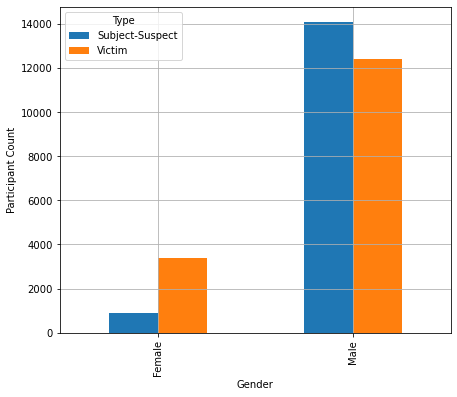

In [9]:
df_pivot = pd.pivot_table(
	merged_df2,
	values="incident_id",
	index="Gender",
	columns="Type",
	aggfunc=np.count_nonzero
)


ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()

fig.set_size_inches(7, 6)

ax.set_xlabel("Gender")
ax.set_ylabel("Participant Count")


ax.grid()
fig.savefig("Gender_Type.png")



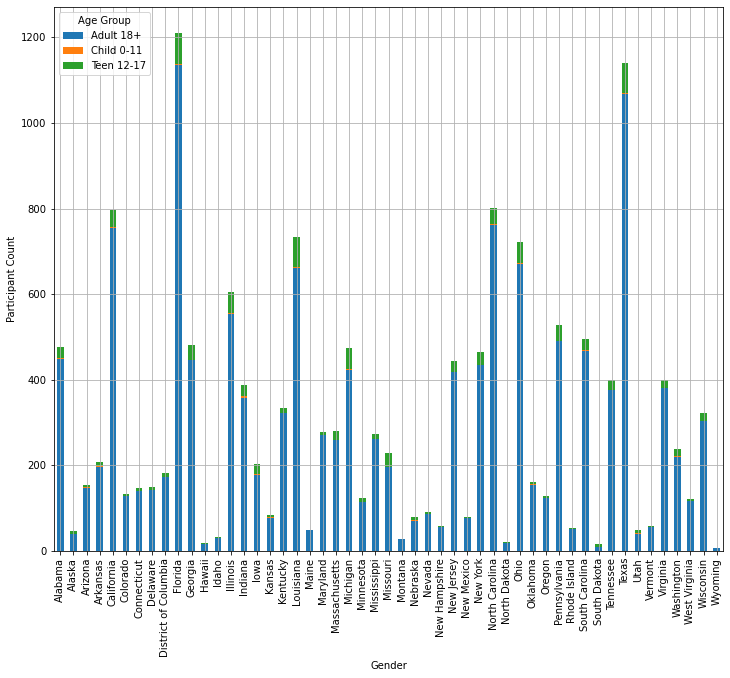

In [10]:
df_pivot2 = pd.pivot_table(
	dd_suspect_df,
	values="incident_id",
	index="state",
	columns="Age Group",
	aggfunc=np.count_nonzero
)


ax2 = df_pivot2.plot(kind="bar",stacked=True)
fig2 = ax2.get_figure()

fig2.set_size_inches(12, 10)

ax2.set_xlabel("Gender")
ax2.set_ylabel("Participant Count")


ax2.grid()
fig2.savefig("Gender_Type.png")

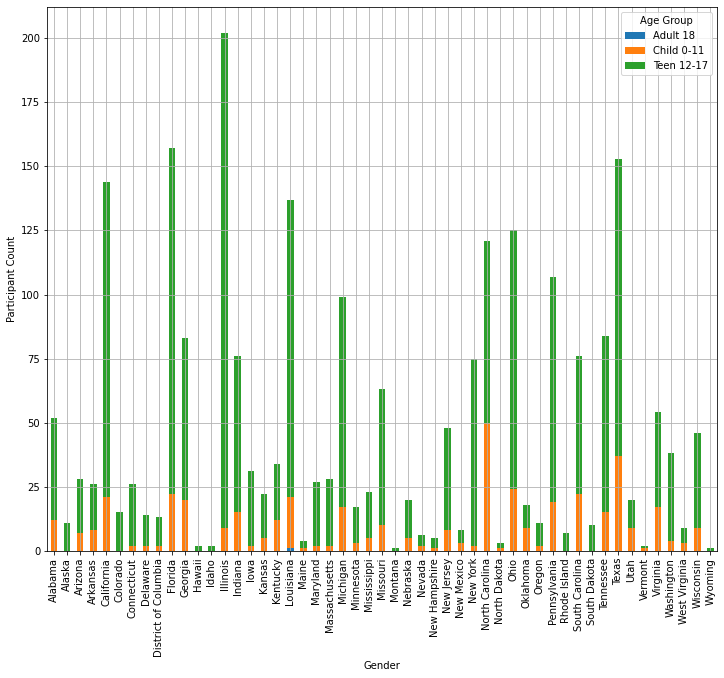

In [11]:
df_pivot3 = pd.pivot_table(
	dd_nonadult_df,
	values="incident_id",
	index="state",
	columns="Age Group",
	aggfunc=np.count_nonzero
)


ax3 = df_pivot3.plot(kind="bar",stacked=True)
fig3 = ax3.get_figure()

fig3.set_size_inches(12, 10)

ax3.set_xlabel("Gender")
ax3.set_ylabel("Participant Count")


ax3.grid()
fig3.savefig("Gender_Type.png")